In [1]:
import pandas as pd
import os
import gc
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

%matplotlib inline


In [2]:
train = pd.read_csv('E:\Jupyter-work/train.csv',encoding='gb18030')
test = pd.read_csv('E:\Jupyter-work/test.csv',encoding='gb18030')
pd.set_option('display.max_columns', None)    # 显示所有列
train.head(10)

,CUST_ID,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHAN

In [3]:
dupNum = train.shape[0] - train.drop_duplicates().shape[0]
print("数据集中有%s列重复值" % dupNum)

数据集中有0列重复值


In [4]:
dupNum = test.shape[0] - test.drop_duplicates().shape[0]
print("测试集中有%s列重复值" % dupNum)

测试集中有0列重复值


In [5]:
#没有重复值
#统计数据集中缺失情况
train.isnull().any()

CUST_ID                         False
OPEN_ORG_NUM                    False
IDF_TYP_CD                      False
GENDER                          False
bad_good                        False
                                ...  
L6_CHANNEL_TXN_DOUTTA_AVGAMT    False
L6_CHANNEL_TXN_STAIN_AVGCNT     False
L6_CHANNEL_TXN_SOUTTA_AVGCNT    False
L6_CHANNEL_TXN_DTAIN_AVGCNT     False
L6_CHANNEL_TXN_DOUTTA_AVGCNT    False
Length: 627, dtype: bool

In [6]:
#没有缺失值
# 查看数值类特征的统计信息
train.describe()

,CUST_ID,OPEN_ORG_NUM,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_INSURE_CNT,CHANNEL_CTR_GLOAN_AMT,CHANNEL_CTR_GLOAN_CNT,L3_CHANNEL_CTR_FUND_MONTHAVG_AMT,L3_CHANNEL_CTR_FUND_MONTHAVG_CNT,L3_CHANNEL_CTR_FINANCIAL_MONTHAV,L3_CHANNEL_CTR_FINANCIAL_MONTHA0,L3_CHANNEL_CTR_INSURE_MONTHAVG_A,L3_CHANNEL_CTR_INSURE_MONTHAVG_C,L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN,L6_CHANNEL_CTR_FUND_MONTHAVG_AMT,L6_CHANNEL_CTR_FUND_MONTHAVG_CNT,L6_CHANNEL_CTR_FINANCIAL_MONTHAV,L6_CHANNEL_CTR_FINANCIAL_MONTHA0,L6_CHANNEL_CTR_INSURE_MONTHAVG_A,L6_CHANNEL_CTR_INSURE_MONTHAVG_C,L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L6_CHANNEL_CTR_GLOAN_MO

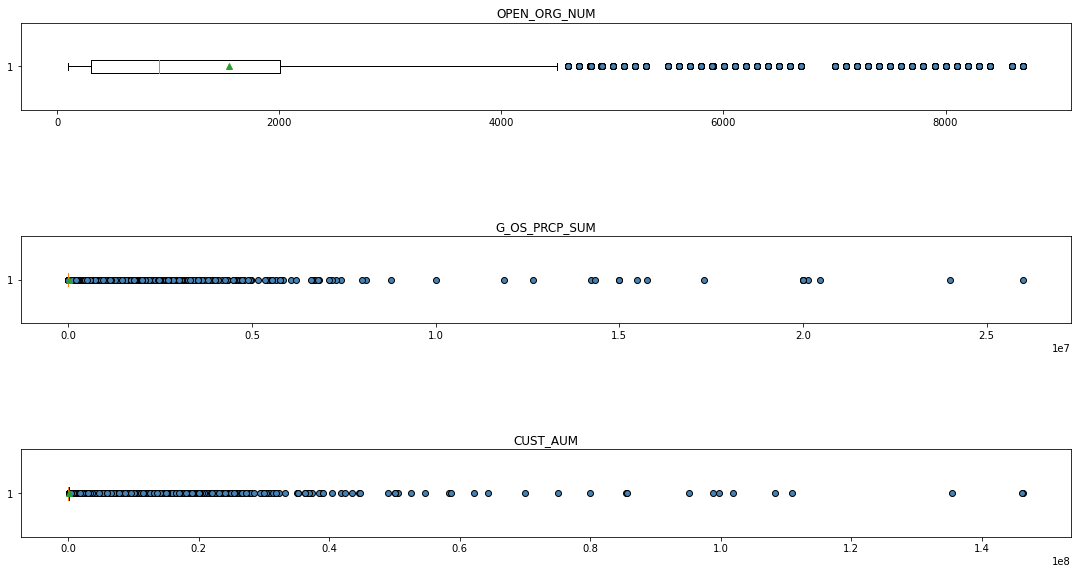

In [25]:
# 箱型图观察异常值情况
import seaborn as sns
import matplotlib.pyplot as plt    # 可视化
# 在Jupyter notebook里嵌入图片
import matplotlib
%matplotlib inline

# 分析百分比特征
fig = plt.figure(figsize=(17,10)) # 建立图像


ax1 = fig.add_subplot(311)    # 子图1
list1 = list(train['OPEN_ORG_NUM'])
ax1.boxplot(list1, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax1.set_title('OPEN_ORG_NUM')


ax2 = fig.add_subplot(312)    # 子图2
list2 = list(train['G_OS_PRCP_SUM'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('G_OS_PRCP_SUM')


ax3 = fig.add_subplot(313)    # 子图3
list3 = list(train['CUST_AUM'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('CUST_AUM')

plt.tight_layout(pad=8)    # 设置子图之间的间距
plt.show() # 展示箱型图

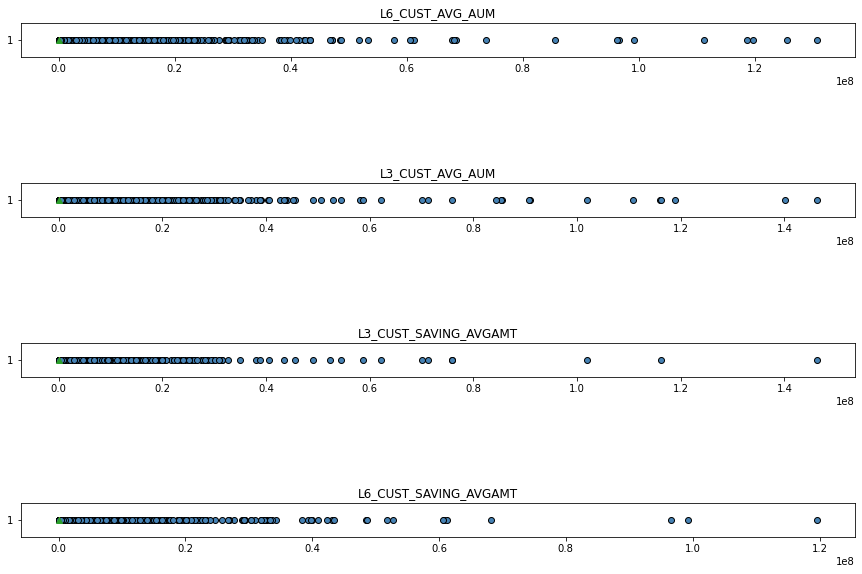

In [24]:
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(411)    # 子图1
list1 = list(train['L6_CUST_AVG_AUM'])
ax1.boxplot(list1, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax1.set_title('L6_CUST_AVG_AUM')


ax2 = fig.add_subplot(412)    # 子图2
list2 = list(train['L3_CUST_AVG_AUM'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('L3_CUST_AVG_AUM')


ax3 = fig.add_subplot(413)    # 子图3
list3 = list(train['L3_CUST_SAVING_AVGAMT'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('L3_CUST_SAVING_AVGAMT')

ax4 = fig.add_subplot(414)    # 子图3
list4 = list(train['L6_CUST_SAVING_AVGAMT'])
ax4.boxplot(list4, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax4.set_title('L6_CUST_SAVING_AVGAMT')

plt.tight_layout(pad=8)    # 设置子图之间的间距
plt.show() # 展示箱型图

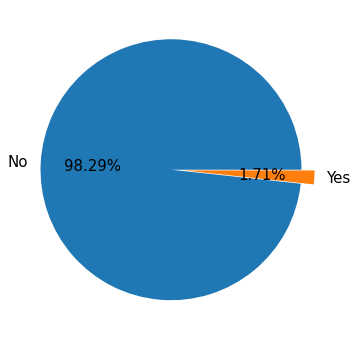

In [46]:
# 观察是否存在类别不平衡现象
p = train['bad_good'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)
    
plt.show()    # 展示图像

In [ ]:
#可见逾期用户占比小
'''
import seaborn as sns
import matplotlib.pyplot as plt    
import matplotlib
baseCols = ['CUST_AUM','L6_CUST_AVG_AUM','L6_CUST_SAVING_AVGAMT','guozhai_flag','L3_DR_CNT','DR_AMT','DR_CNT','L3_CR_AMT','L6_CR_AMT','CR_AMT','CUST_ACCOUNT_CNT']
for i in baseCols:
    cnt = pd.crosstab(train[i], train['bad_good'])    # 构建特征与目标变量的列联表
    cnt.plot.bar(stacked=True)    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
    plt.show()    # 展示图像'''

In [5]:
####其中一种处理方法，参考
train.drop('bad_good',axis=1,inplace=True)#删除train的标签
full=pd.concat([train,test],axis=0) #合并train和test
full_num=full.select_dtypes(include=[np.number])#找出数值列
full_non_num=full.select_dtypes(exclude=[np.number])#找出类别列
full_non_numDf=pd.get_dummies(full_non_num)   #进行one-hot编码 得到了 01 特征，解决了分类器不能处理类别特征的问题。
full_x=pd.concat([full,full_non_numDf],axis=1) #one-hot编码后数据
full_x.drop(['IDF_TYP_CD', 'GENDER', 'CUST_EUP_ACCT_FLAG', 'CUST_AU_ACCT_FLAG', #删除原文本列
       'CUST_SALARY_FINANCIAL_FLAG', 'CUST_SOCIAL_SECURITYIC_FLAG',
       'CUST_MTFLOW_FLAG', 'CUST_DOLLER_FLAG', 'CUST_INTERNATIONAL_GOLD_FLAG',
       'CUST_INTERNATIONAL_COMMON_FLAG', 'CUST_INTERNATIONAL_SIL_FLAG',
       'CUST_INTERNATIONAL_DIAMOND_FLAG', 'CUST_GOLD_COMMON_FLAG',
       'CUST_STAD_PLATINUM_FLAG', 'CUST_LUXURY_PLATINUM_FLAG',
       'CUST_PLATINUM_FINANCIAL_FLAG', 'CUST_DIAMOND_FLAG',
       'CUST_INFINIT_FLAG', 'CUST_BUSINESS_FLAG', 'DEP_SA_FLAG', 'DEP_TD_FLAG',
       'LOAN_FLAG', 'FUND_FLAG', 'C_FUND_FLAG', 'D_FUND_FLAG', 'S_FUND_FLAG',
       'BOND_FLAG', 'CER_BOND_FLAG', 'BK_BOND_FLAG', 'CRED_FLAG',
       'RELATED_REPAY_FLAG', 'TOT_REPAY_FLAG'],axis=1,inplace=True)#删除原文本列

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# 目标值
target = train.pop('bad_good')
# 开户机构号
open_org_num = train.pop('OPEN_ORG_NUM')

# 构建类别特征字段名称
# 类别特征
cate_cols = train.dtypes[train.dtypes==object].index.tolist()
num_cols = [col for col in train.columns.tolist() if col not in cate_cols + ['CUST_ID']]
category = train[cate_cols]
numberic = train[num_cols]

In [8]:
scaler = MinMaxScaler()
numberic = pd.DataFrame(scaler.fit_transform(numberic), columns=numberic.columns)
numberic.head()

,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_INSURE_CNT,CHANNEL_CTR_GLOAN_AMT,CHANNEL_CTR_GLOAN_CNT,L3_CHANNEL_CTR_FUND_MONTHAVG_AMT,L3_CHANNEL_CTR_FUND_MONTHAVG_CNT,L3_CHANNEL_CTR_FINANCIAL_MONTHAV,L3_CHANNEL_CTR_FINANCIAL_MONTHA0,L3_CHANNEL_CTR_INSURE_MONTHAVG_A,L3_CHANNEL_CTR_INSURE_MONTHAVG_C,L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN,L6_CHANNEL_CTR_FUND_MONTHAVG_AMT,L6_CHANNEL_CTR_FUND_MONTHAVG_CNT,L6_CHANNEL_CTR_FINANCIAL_MONTHAV,L6_CHANNEL_CTR_FINANCIAL_MONTHA0,L6_CHANNEL_CTR_INSURE_MONTHAVG_A,L6_CHANNEL_CTR_INSURE_MONTHAVG_C,L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L6_CHANNEL_CTR_GLOAN_MONTHAVG_CN,CHANNEL_WEBBANK_FUND

In [9]:
#数据清洗
category['GENDER'] = category['GENDER'].apply(lambda x: 'F' if x in ['2', 2] else ('M' if x in ['1', 1] else x))
category['FUND_FLAG'] = category['FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else x)
category['C_FUND_FLAG'] = category['C_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
category['D_FUND_FLAG'] = category['D_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
category['S_FUND_FLAG'] = category['S_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))

In [10]:
#特征独热编码
def onehot_model(train):
    one_hot = OneHotEncoder(handle_unknown='ignore').fit(train)
    feature_names = one_hot.get_feature_names(train.columns)
    data = pd.DataFrame(one_hot.transform(train).toarray(), columns=feature_names)
    return data

category = onehot_model(category.astype(object))
category.head()

,IDF_TYP_CD_ZR01,IDF_TYP_CD_ZR02,IDF_TYP_CD_ZR03,IDF_TYP_CD_ZR04,IDF_TYP_CD_ZR05,IDF_TYP_CD_ZR06,IDF_TYP_CD_ZR07,IDF_TYP_CD_ZR08,IDF_TYP_CD_ZR09,IDF_TYP_CD_ZR10,IDF_TYP_CD_ZR11,IDF_TYP_CD_ZR12,IDF_TYP_CD_ZR13,IDF_TYP_CD_ZR14,IDF_TYP_CD_ZR16,IDF_TYP_CD_ZR20,IDF_TYP_CD_ZR21,IDF_TYP_CD_ZR22,GENDER_F,GENDER_M,GENDER_X,CUST_EUP_ACCT_FLAG_N,CUST_EUP_ACCT_FLAG_Y,CUST_AU_ACCT_FLAG_N,CUST_AU_ACCT_FLAG_Y,CUST_SALARY_FINANCIAL_FLAG_N,CUST_SALARY_FINANCIAL_FLAG_Y,CUST_SOCIAL_SECURITYIC_FLAG_N,CUST_MTFLOW_FLAG_N,CUST_DOLLER_FLAG_N,CUST_DOLLER_FLAG_Y,CUST_INTERNATIONAL_GOLD_FLAG_N,CUST_INTERNATIONAL_GOLD_FLAG_Y,CUST_INTERNATIONAL_COMMON_FLAG_N,CUST_INTERNATIONAL_COMMON_FLAG_Y,CUST_INTERNATIONAL_SIL_FLAG_N,CUST_INTERNATIONAL_SIL_FLAG_Y,CUST_INTERNATIONAL_DIAMOND_FLAG_N,CUST_INTERNATIONAL_DIAMOND_FLAG_Y,CUST_GOLD_COMMON_FLAG_N,CUST_GOLD_COMMON_FLAG_Y,CUST_STAD_PLATINUM_FLAG_N,CUST_STAD_PLATINUM_FLAG_Y,CUST_LUXURY_PLATINUM_FLAG_N,CUST_LUXURY_PLATINUM_FLAG_Y,CUST_PLATINUM_FINANCIAL_FLAG_N,CUST_PLATINUM_FINANCIAL_FLAG_Y,CUST_DIAMOND_FLAG_N,CUST_DIAMOND_FLAG_Y,CUST_INFINIT_FLAG_N,CUST_INFINIT_FLAG_Y,CUST_BUSINESS_FLAG_N,CUST_BUSINESS_FLAG_Y,DEP_SA_FLAG_N,DEP_SA_FLAG_Y,DEP_TD_FLAG_N,DEP_TD_FLAG_Y,LOAN_FLAG_N,LOAN_FLAG_Y,FUND_FLAG_N,FUND_FLAG_Y,C_FUND_FLAG_N,C_FUND_FLAG_Y,D_FUND_FLAG_N,D_FUND_FLAG_Y,S_FUND_FLAG_N,S_FUND_FLAG_Y,BOND_FLAG_N,BOND_FLAG_Y,CER_BOND_FLAG_N,CER_BOND_FLAG_Y,BK_BOND_FLAG_N,CRED_FLAG_N,CRED_FLAG_Y,RELATED_REPAY_FLAG_N,RELATED_REPAY_FLAG_Y,TOT_REPAY_FLAG_N,TOT_REPAY_FLAG_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [11]:
test_cols = test.dtypes[test.dtypes==object].index.tolist()
num_test = [col for col in test.columns.tolist() if col not in test_cols + ['CUST_ID']]
test1 = test[test_cols]
#数据清洗  转换
test1['GENDER'] = test1['GENDER'].apply(lambda x: 'F' if x in ['2', 2] else ('M' if x in ['1', 1] else x))
test1['FUND_FLAG'] = test1['FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else x)
test1['C_FUND_FLAG'] = test1['C_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
test1['D_FUND_FLAG'] = test1['D_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
test1['S_FUND_FLAG'] = test1['S_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
#特征独热编码
def onehot_model1(test):
    one_hot1 = OneHotEncoder(handle_unknown='ignore').fit(test)
    test_feature_names = one_hot1.get_feature_names(test.columns)
    data1 = pd.DataFrame(one_hot1.transform(test).toarray(), columns=test_feature_names)
    return data1

test1 = onehot_model1(test1.astype(object))
test1.head()

,IDF_TYP_CD_ZR01,IDF_TYP_CD_ZR02,IDF_TYP_CD_ZR03,IDF_TYP_CD_ZR04,IDF_TYP_CD_ZR05,IDF_TYP_CD_ZR06,IDF_TYP_CD_ZR07,IDF_TYP_CD_ZR08,IDF_TYP_CD_ZR09,IDF_TYP_CD_ZR10,IDF_TYP_CD_ZR11,IDF_TYP_CD_ZR12,IDF_TYP_CD_ZR13,IDF_TYP_CD_ZR20,IDF_TYP_CD_ZR21,IDF_TYP_CD_ZR22,GENDER_F,GENDER_M,GENDER_X,CUST_EUP_ACCT_FLAG_N,CUST_EUP_ACCT_FLAG_Y,CUST_AU_ACCT_FLAG_N,CUST_AU_ACCT_FLAG_Y,CUST_SALARY_FINANCIAL_FLAG_N,CUST_SALARY_FINANCIAL_FLAG_Y,CUST_SOCIAL_SECURITYIC_FLAG_N,CUST_MTFLOW_FLAG_N,CUST_DOLLER_FLAG_N,CUST_DOLLER_FLAG_Y,CUST_INTERNATIONAL_GOLD_FLAG_N,CUST_INTERNATIONAL_GOLD_FLAG_Y,CUST_INTERNATIONAL_COMMON_FLAG_N,CUST_INTERNATIONAL_COMMON_FLAG_Y,CUST_INTERNATIONAL_SIL_FLAG_N,CUST_INTERNATIONAL_SIL_FLAG_Y,CUST_INTERNATIONAL_DIAMOND_FLAG_N,CUST_INTERNATIONAL_DIAMOND_FLAG_Y,CUST_GOLD_COMMON_FLAG_N,CUST_GOLD_COMMON_FLAG_Y,CUST_STAD_PLATINUM_FLAG_N,CUST_STAD_PLATINUM_FLAG_Y,CUST_LUXURY_PLATINUM_FLAG_N,CUST_LUXURY_PLATINUM_FLAG_Y,CUST_PLATINUM_FINANCIAL_FLAG_N,CUST_PLATINUM_FINANCIAL_FLAG_Y,CUST_DIAMOND_FLAG_N,CUST_DIAMOND_FLAG_Y,CUST_INFINIT_FLAG_N,CUST_INFINIT_FLAG_Y,CUST_BUSINESS_FLAG_N,CUST_BUSINESS_FLAG_Y,DEP_SA_FLAG_N,DEP_SA_FLAG_Y,DEP_TD_FLAG_N,DEP_TD_FLAG_Y,LOAN_FLAG_N,LOAN_FLAG_Y,FUND_FLAG_N,FUND_FLAG_Y,C_FUND_FLAG_N,C_FUND_FLAG_Y,D_FUND_FLAG_N,D_FUND_FLAG_Y,S_FUND_FLAG_N,S_FUND_FLAG_Y,BOND_FLAG_N,BOND_FLAG_Y,CER_BOND_FLAG_N,CER_BOND_FLAG_Y,BK_BOND_FLAG_N,CRED_FLAG_N,CRED_FLAG_Y,RELATED_REPAY_FLAG_N,RELATED_REPAY_FLAG_Y,TOT_REPAY_FLAG_N,TOT_REPAY_FLAG_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [12]:
# 特征选择,基于卡方检验
# train=SelectKBest(chi2,k=20).fit_transform(train,target)

# 基于惩罚项的特征选择法
# train=SelectFromModel(LogisticRegression(penalty='l1',C=0.1)).fit_transform(train,target)

# 基于树模型的特征选择

# train=SelectFromModel(GradientBoostingClassifier()).fit_transform(train,target)

# 降维,基于pca
from sklearn.decomposition import PCA
pca=PCA(n_components=50)

train=pca.fit_transform(category)
test=pca.fit_transform(test1)

In [13]:
#特征合并
feature = numberic.join(category)
feature.index = range(len(feature))
x_train=feature
x_train=x_train.values[0:285285,:]
x_test = test1.values
x_test=x_test[285285:,:]

In [14]:
#模型构建
x_train, x_test, y_train, y_test = train_test_split(x_train, target, test_size=0.3, random_state=0)

In [15]:
#SMOTE过采样
x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

In [16]:
from xgboost import XGBClassifier
parameters= [{
                  'max_depth':[3,5,7], ##5)
                  'learning_rate':[0.1,0.5, 1.0],#0.1
                  'subsample':[0.75,0.8,0.85,0.9],#0.8
                  'min_child_weight':[1,3,5]#5

                  }]
#parameters= [{'n_estimators':[100,200,500,1000]
#                  }]
# 定义模型
model = XGBClassifier(nthread=4, #含义：nthread=-1时，使用全部CPU进行并行运算（默认）, nthread=1时，使用1个CPU进行运算。
                      learning_rate=0.08, #含义：学习率，控制每次迭代更新权重时的步长，默认0.3。调参：值越小，训练越慢。典型值为0.01-0.2。
                      n_estimators=50, #含义：总共迭代的次数，即决策树的个数
                      max_depth=5, #含义：树的深度，默认值为6，典型值3-10。调参：值越大，越容易过拟合；值越小，越容易欠拟合
                      gamma=0, #含义：惩罚项系数，指定节点分裂所需的最小损失函数下降值。
                      subsample=0.9, #含义：训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。调参：防止overfitting。
                      colsample_bytree=0.5) #训练每棵树时，使用的特征占全部特征的比例。默认值为1，典型值为0.5-1。调参：防止overfitting。

model.fit(x_resampled, y_resampled)
# 预测及 AUC 评测
y_pred_test = model.predict(x_test)
xgb_test_auc = roc_auc_score(y_test, y_pred_test)
print('xgboost test auc: %.5f' % xgb_test_auc)

[22:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost test auc: 0.99999


In [17]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [18]:
data1 = pd.read_csv('E:\Jupyter-work/train.csv',encoding='gb18030')

In [19]:
test0 = pd.read_csv('E:\Jupyter-work/test.csv',encoding='gb18030')

In [20]:
# 所有的特征
feature_names = list(data1.drop('bad_good', axis=1).columns) # 拿到所有的特征


In [41]:
#一个已训练的Xgboost模型能够自动计算特征重要性，这些重要性得分可以通过成员变量feature_importances_得到。可以通过如下命令打印：
print(model.feature_importances_)

[0.00959796 0.01645038 0.6765859  0.29736578]


NameError: name 'pyplot' is not defined

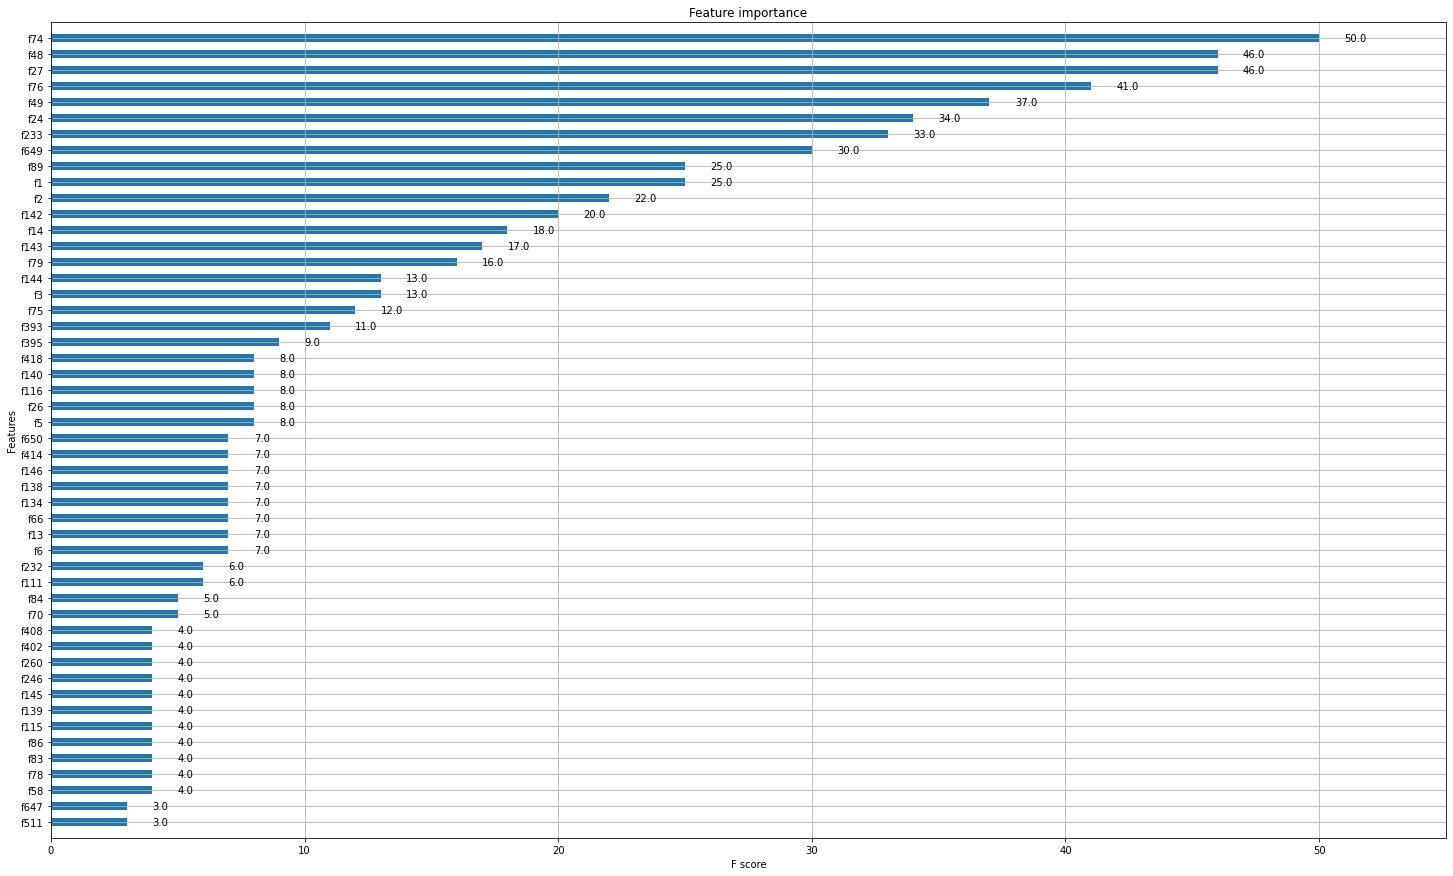

In [33]:
#XGBoost输出特征重要性以及筛选特征
# plot feature importance  
fig,ax = plt.subplots(figsize=(25,15))
plot_importance(model,ax=ax,max_num_features=50,height=0.5)
#plot_importance(model)
pyplot.show()

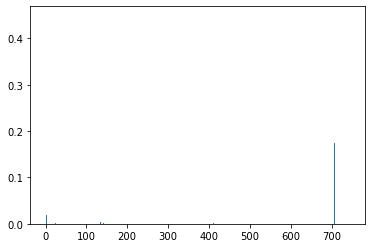

In [39]:
# plot  在条形图上绘制这些分数，以便获得数据集中每个特征的相对重要性的直观显示
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

[00:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.00959796 0.01645038 0.6765859  0.29736578]


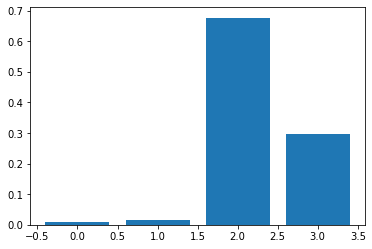

In [40]:
# plot feature importance manually
#首先输出特征重要性分数：,然后是相对重要条形图
#只显示了特征重要性而没有排序，可以在绘制之前对特征重要性得分进行排序。
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.datasets import load_iris
# load data
dataset = load_iris()
# split data into X and y
X = dataset.data
y = dataset.target
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


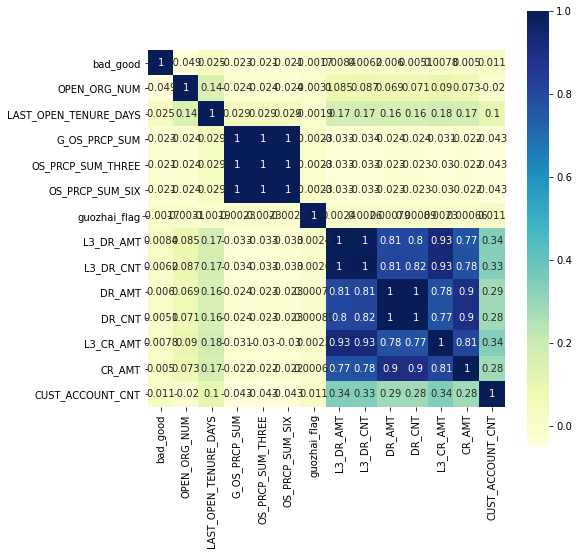

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
nu_fea = train[['bad_good','OPEN_ORG_NUM','LAST_OPEN_TENURE_DAYS','G_OS_PRCP_SUM','OS_PRCP_SUM_THREE','OS_PRCP_SUM_SIX','guozhai_flag','L3_DR_AMT',
               'L3_DR_CNT','DR_AMT','DR_CNT','L3_CR_AMT','CR_AMT','CUST_ACCOUNT_CNT']]   
nu_fea = list(nu_fea)    # 特征名列表
pearson_mat = train[nu_fea].corr(method='spearman')    # 计算皮尔逊相关系数矩阵

plt.figure(figsize=(8,8)) # 建立图像
sns.heatmap(pearson_mat, square=True, annot=True, cmap="YlGnBu")    # 用热度图表示相关系数矩阵
plt.show() # 展示热度图

In [21]:
#LR模型
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [22]:
#SVM模型
#from sklearn import svm
#线性核
#svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(x_train, y_train)
# 多项式SVM
#svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(x_train, y_train)
#svm_rbf = svm.SVC(probability=True).fit(x_train, y_train)
#svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(x_train, y_train)

In [36]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)


[14:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
from sklearn.tree import DecisionTreeClassifier
#决策树模型
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [38]:
from lightgbm.sklearn import LGBMClassifier
#LightGBM模型
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)


LGBMClassifier()

In [39]:
#观察accuracy、precision，recall和f1-score、auc的取值，并画出roc曲线图
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

def model_metrics(clf, x_train, x_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    y_train_proba = clf.predict_proba(x_train)[:,1]
    y_test_proba = clf.predict_proba(x_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")


逻辑回归预测
[准确率] 训练集： 0.9894 测试集： 0.9889
[精准率] 训练集： 0.7979 测试集： 0.7685
[召回率] 训练集： 0.5145 测试集： 0.5044
[f1-score] 训练集： 0.6256 测试集： 0.6091
[auc值] 训练集： 0.9956 测试集： 0.9960
决策树预测
[准确率] 训练集： 1.0000 测试集： 1.0000
[精准率] 训练集： 1.0000 测试集： 0.9993
[召回率] 训练集： 1.0000 测试集： 1.0000
[f1-score] 训练集： 1.0000 测试集： 0.9997
[auc值] 训练集： 1.0000 测试集： 1.0000
[准确率] 训练集： 1.0000 测试集： 1.0000
[精准率] 训练集： 1.0000 测试集： 0.9993
[召回率] 训练集： 1.0000 测试集： 1.0000
[f1-score] 训练集： 1.0000 测试集： 0.9997
[auc值] 训练集： 1.0000 测试集： 1.0000
[准确率] 训练集： 1.0000 测试集： 1.0000
[精准率] 训练集： 1.0000 测试集： 1.0000
[召回率] 训练集： 1.0000 测试集： 1.0000
[f1-score] 训练集： 1.0000 测试集： 1.0000
[auc值] 训练集： 1.0000 测试集： 1.0000


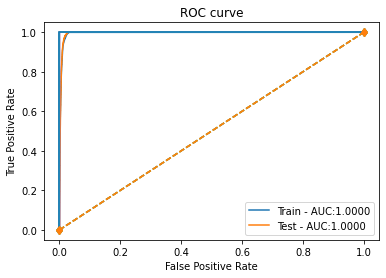

In [41]:
# 逻辑回归
print('逻辑回归预测')
model_metrics(lr, x_train, x_test, y_train, y_test)
# 线性SVM
#model_metrics(svm_linear, X_train, X_test, y_train, y_test)
# 多项式SVM
#model_metrics(svm_poly, X_train, X_test, y_train, y_test)
# 高斯核SVM
#model_metrics(svm_rbf, X_train, X_test, y_train, y_test)
# sigmoid-SVM
#model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)
# 决策树
print('决策树预测')
model_metrics(clf, x_train, x_test, y_train, y_test)
# XGBoost
model_metrics(xgb, x_train, x_test, y_train, y_test)
# lightGBM
model_metrics(lgb, x_train, x_test, y_train, y_test)


In [88]:
#产生csv结果文件
df = pd.DataFrame({'CUST_ID': test0['CUST_ID']})
df['CUST_ID'] = pd.to_numeric(df['CUST_ID']).round(0).astype(int) 
df['bad_good'] = pd.Series(lgb.predict(x_test))
df=df.fillna(0)
df['bad_good'].astype(int) 
df.to_csv('submission.csv',index = False)